In [ ]:
판다스 10분 완성 (과제), 데이터 전처리 및 시각화 강의실습

In [333]:
# 판다스 10분 완성 - object creation 객체 생성편

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 리스트를 통해 시리즈를 만들고 정수로 만들어진 인덱스를 기본값으로 불러온다.

s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [334]:
dates = pd.date_range('20130101', periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [335]:
# datetime 인덱스와 레이블이 있는 열로 numpy배열을 전달하여 데이터프레임을 만든다.
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.615882,-1.147134,0.843183,0.110319
2013-01-02,-1.316305,0.138942,0.232551,1.207478
2013-01-03,0.822891,-2.059820,-0.360594,-0.169610
2013-01-04,-0.223537,-0.165692,-0.726397,1.862631
2013-01-05,-0.057037,-0.020888,0.038359,-0.192497
2013-01-06,-1.173301,-0.962067,1.558353,-0.445617


In [336]:
# 시리즈와 같은 것으로 변환될 수 있는 객체들의 디렉토리로 구성된 데이터프레임을 만든다.
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3]*4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [337]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [1]:
# 판다스 라이브러리 불러오기
import pandas as pd

In [2]:
# 오픈소스 데이터 셋 불러올텐데 시본을 통해 오픈소스 내장 데이터 불러오기
# 맷플롯처럼 데이터를 시각화하는 라이브러리 중 하나이다. 이번엔 맷플롯만.
import seaborn as sns

In [ ]:
데이터 전처리와 시각화 강의

In [ ]:
01. pandas 알아보기
    a. 데이터 불러오기
    b. 데이터 저장하기
    c. 인덱스

In [3]:
# 데이터 불러오는데 data변수 안에 할당해준다.
data = sns.load_dataset('tips')

In [4]:
# 데이터 출력 = 데이터 프레임 형태의 데이터 셋을 볼 수 있다.
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
# 데이터 불러왔으니 이제 저장한다. 경로 따로 안주면 현재 위치에 csv파일 생성.
data.to_csv("tips_data.csv")

In [31]:
# 다시 데이터 불러오기
df = pd.read_csv("tips_data.csv")
df
# 저장/불러올 때 별도의 인덱스 설정 없으면 컬럼의 형태로 들어오는 경우가 존재한다.

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
# 1) 저장할 때 인덱스를 처리하는 방법
data.to_csv("tips_data.csv",  index=False)
# 아무것도 적지 않은 기본 값이 index=True이다.
# 나중에 데이터 전처리가 끝난 데이터들을 이런 식으로 파일화 시키면 된다:)
df = pd.read_csv("tips_data.csv")
df
# 이제 인덱스가 별도의 컬럼으로 들어오지 않음.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
# 2) 또는 불러올 때 인덱스를 처리하는 방법
data.to_csv("tips_data.csv")

In [10]:
df = pd.read_csv("tips_data.csv", index_col=0)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 폴더를 하나 생성(파일이름temp)해서 파일 경로를 지정하는 방법
df.to_csv("temp/tips_data.csv", index=False)

In [ ]:
# excel파일로 저장할 수도 있다.
df.to_excel("temp/tips_data.xlsx", index=False)

In [ ]:
여기까지 데이터를 불러오고 저장하는 방법을 배웠다.
csv파일이나 엑셀파일로 저장해서 데이터를 활용하며 전처리를 시작한다.
만약 에러가 발생하면 아마 설치유무이기 때문에,
pip install openpyxl
을 터미널에 입력해 설치하면 엑셀파일도 불러오기/저장도 잘 될 것이다.

In [ ]:
01. pandas 알아보기
    c. 인덱스(지금부터)

In [ ]:
먼저 인덱스를 설명하기 위해 데이터 프레임을 만들어 본다.

In [14]:
# 중괄호 안에 딕셔너리 형태로 데이터를 넣어서 데이터 프레임을 만든다.
df = pd.DataFrame({
    'A' : [1,2,3],
    'B' : ['a','b','c']
    }, index = ['idx1', 'idx2', 'idx3'])
df
# 기본적으로 인덱스는 0부터 시작하는 정수로 기본값이 정해져서 입력된다.
# index= 으로 인덱스 별도의 이름을 지정해줄 수도 있다.

,A,B
idx1,1,a
idx2,2,b
idx3,3,c


In [15]:
# loc라고 인덱스를 이용해 데이터를 확인할 수 있다.
df.loc['idx2'] # =두번째 행에 대한 정보를 모두 가져와라.

A    2
B    b
Name: idx2, dtype: object

In [16]:
# 정렬하기
df.sort_index()

,A,B
idx1,1,a
idx2,2,b
idx3,3,c


In [17]:
# 인덱스를 다시 지정하기
df.set_index('A') # =A컬럼으로 인덱스를 쓰겠다.
# A가 가진 값이 인덱스로 고스란히 넘어간다.

,B
A,
1,a
2,b
3,c


In [19]:
# 인덱스 값이 무엇이고 타입은 무엇인지 확인가능
df.index
# 인덱스 확인 코드에 변경도 가능하다. (밑에)

Index(['idx1', 'idx2', 'idx3'], dtype='object')

In [26]:
df.index = ['ㄱ','ㄴ','ㄷ']
df

,A,B
ㄱ,1,a
ㄴ,2,b
ㄷ,3,c


In [28]:
# 인덱스를 기존 값으로 변경하기
df.reset_index()

,index,A,B
0,ㄱ,1,a
1,ㄴ,2,b
2,ㄷ,3,c


In [29]:
# 원래 정수값의 인덱스만 남아있다.
df.reset_index(drop=True)

,A,B
0,1,a
1,2,b
2,3,c


In [ ]:
02. 데이터 확인 : 판다스에서 컬럼 활용하기

In [33]:
# 데이터 프레임 만들기
data = {
    'name' : ['Alice', 'Bob', 'Charlie'],
    'age' : [23, 30, 35],
    'gender' : ['female', 'male', 'male']
}

df = pd.DataFrame(data)

df

,name,age,gender
0,Alice,23,female
1,Bob,30,male
2,Charlie,35,male


In [34]:
df['name'] # 컬럼명 입력

0      Alice
1        Bob
2    Charlie
Name: name, dtype: object

In [35]:
df.columns # 컬럼에한 구성을 알아볼 수 있음.

Index(['name', 'age', 'gender'], dtype='object')

In [36]:
# 컬럼 이름 바꾸기 (1)
df.columns = ['이름', '나이', '성별']
df

,이름,나이,성별
0,Alice,23,female
1,Bob,30,male
2,Charlie,35,male


In [37]:
# 컬럼 이름 바꾸기 (2) - 1개만 바꾸기
df.rename(columns={'이름':'name'})

,name,나이,성별
0,Alice,23,female
1,Bob,30,male
2,Charlie,35,male


In [41]:
# 컬럼 이름 바꾸기 (3) - 여러개 바꾸기
df.rename(columns={'나이':'연령', '성별':'남/여'})

# 딕셔너리는 =등호 아니고 :콜론이다. 자꾸 실수함.
# 내가 보니까 =으로 지정해주면 df변수를 호출하고 그냥 예약어는 바로 출력하네.

,이름,연령,남/여
0,Alice,23,female
1,Bob,30,male
2,Charlie,35,male


In [43]:
# 컬럼 추가도 가능하다.
df['스포츠'] = '축구'
df

,이름,나이,성별,스포츠
0,Alice,23,female,축구
1,Bob,30,male,축구
2,Charlie,35,male,축구


In [44]:
# 삭제도 가능하다.
del df['스포츠']
df

,이름,나이,성별
0,Alice,23,female
1,Bob,30,male
2,Charlie,35,male


In [ ]:
02. 데이터 확인 : 데이터의 기초통계량 확인

In [45]:
df = pd.read_csv("tips_data.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
df.head(3)
# 1. 숫자만큼 데이터 행을 가져온다.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [48]:
# 2. 데이터 프레임에 대한 정보를 보여준다.
df.info()
# 컬럼, 널값 카운트, 데이터 타입등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [49]:
df.describe()
# 3. 기초 통계량 확인 - 숫자 타입의 컬럼값들만 확인 가능

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [50]:
# 4. 결측치: null값 확인 - 을 위한 데이터프레임 제작
df = pd.DataFrame({
    'A':[1,2,3,4],
    'B':[5,6,7,None]
})
df
# 어떤식으로 확인할 수 있을까?

,A,B
0,1,5.0
1,2,6.0
2,3,7.0
3,4,NaN


In [51]:
df.info()
# nun-null count 빈값이 아닌 값이 몇개가 있는지 세어준다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      int64  
 1   B       3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 196.0 bytes


In [52]:
# 직접적인 메소드
df.isna()

,A,B
0,False,False
1,False,False
2,False,False
3,False,True


In [53]:
# isna 컬럼지정
df['B'].isna()

0    False
1    False
2    False
3     True
Name: B, dtype: bool

In [54]:
# 일종의 조건식으로써 데이터프레임 안에서 불러올 수 있는 기능?
# B컬럼에서 True인 값만 불러온다.
df[df['B'].isna()] # []안에 isna에 대한 조건을 써줬음.

,A,B
3,4,NaN


In [62]:
# 5. 데이터 타입 - 다시 불러오고 시작하려고
df = pd.read_csv("tips_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [63]:
# 해당컬럼이 무슨타입인지 알려준다.
df['total_bill'].dtype

dtype('float64')

In [64]:
# 데이터 타입 바꿔보기
df['total_bill'].astype(str)

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: object

In [65]:
# 다시 원래 컬럼에 할당해야 한다. 아니면 안바뀜.
df['total_bill'] = df['total_bill'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    object 
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.5+ KB


In [66]:
df['total_bill'].astype(int) # 에러코드
# ValueError: invalid literal for int() with base 10: '16.99'
# 에러의 이유 : 16.99값은 정수가 될 수 없음.

ValueError: invalid literal for int() with base 10: '16.99'

In [67]:
# int > str 로 바꾼 상태여서 소수점을 인식할 수 없기에 >
# float 숫자라는 형태로 인식할 수 있어서 > 어떤 부분이 소수점이고, 정수에 해당하는 부분인지 알 수 있어졌기 때문에 가능.
df['total_bill'].astype(float).astype(int)

0      16
1      10
2      21
3      23
4      24
       ..
239    29
240    27
241    22
242    17
243    18
Name: total_bill, Length: 244, dtype: int32

In [72]:
df['total_bill'] = df['total_bill'].astype(float) # 다시 원상복귀 해줬다.
# 컬럼 별로 어떤 타입인지만 나타낸다.
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
보통 info를 많이 사용하는 편이다. 편한대로 사용하면 좋다.

이제 3-4 데이터 선택(iloc, loc)

In [ ]:
iloc는 행번호, 열번호 이렇게 번호를 통해서 특정 행과 열을 선택한다.

loc는 이름으로 특정 문자를 활용해서 해당 이름을 선택해 각 데이터를 불러온다.

순서 : 인덱스를 먼저 > , 이후에 > 컬럼

In [ ]:
03. 데이터 선택 : (1) iloc 사용법

In [74]:
df = pd.DataFrame({
    'A': [1,2,3,4,5],
    'B': [10,20,30,40,50],
    'C': [100,200,300,400,500]
})
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [79]:
# 첫 번재 인덱스에 해당하는 컬럼 값을 확인할 수 있다.
df.iloc[0:5:2] # 건너뛰어서 보고싶은 범위 지정 = 슬라이싱
# df.iloc[0::2] # 생략하면 처음부터 끝까지를 의미한다.

,A,B,C
0,1,10,100
2,3,30,300
4,5,50,500


In [80]:
df.iloc[0,0]

1

In [81]:
df.iloc[0,0:2]
# 1번째 인덱스에서 A, B에 해당하는 값을 출력한다.

A     1
B    10
Name: 0, dtype: int64

In [ ]:
03. 데이터 선택 : (2) loc 사용법

숫자가 아닌 컬럼명이나 인덱스의 이름을 통해 인덱스를 선택하는 방법

In [84]:
# 인덱스가 필요해서 인덱스 추가
df = pd.DataFrame({
    'A': [1,2,3,4,5],
    'B': [10,20,30,40,50],
    'C': [100,200,300,400,500]
}, index=['a','b','c','d','e'])
df

,A,B,C
a,1,10,100
b,2,20,200
c,3,30,300
d,4,40,400
e,5,50,500


In [87]:
df.iloc[:, 0] # 모든 인덱스에서 첫번째 컬럼(복습)

a    1
b    2
c    3
d    4
e    5
Name: A, dtype: int64

In [88]:
# 같은 것을 loc에서는 어떻게 표현하는가?
df.loc[:, 'A'] # 어떤 컬럼인지 "이름"을 선택한다.
# df.loc[1:, 'A'] 은 에러난다.

a    1
b    2
c    3
d    4
e    5
Name: A, dtype: int64

In [89]:
df.loc['b':, 'A']

b    2
c    3
d    4
e    5
Name: A, dtype: int64

In [ ]:
iloc : 숫자값으로 슬라이싱 한다.
loc : 인덱스와 컬럼명을 가지고 슬라이싱을 한다.

In [ ]:
헷갈릴 수 있는 차이점, 메모하고 기억해두자.

iloc : 숫자로 슬라이싱하면 가운데 값이 "미만" 값이지만, = 마지막 인덱스 전까지만 불러온다.
loc : 문자로 슬라이싱하니까 가운데 값도 포함되어 출력된다. = 마지막 인덱스를 포함한다.

In [ ]:
슬라이싱을 통해 데이터를 선택하는 방법을 배워본다.

In [90]:
# 복습 : A라는 컬럼의 모든 인덱스 값을 출력한다.
df.loc[:, 'A']

a    1
b    2
c    3
d    4
e    5
Name: A, dtype: int64

In [91]:
# 위와 동일 값을 출력한다.
df['A']

a    1
b    2
c    3
d    4
e    5
Name: A, dtype: int64

In [111]:
# 두 컬럼을 가져오려면 리스트로 한 번 더 묶어주고, 순서도 마음대로 변경할 수 있다.
df[['B', 'A']]

,B,A
a,10,1
b,20,2
c,30,3
d,40,4
e,50,5


In [114]:
# loc + list 이용해서 위처럼 만드는 법, 얘도 순서가 가능하다.
df.loc['a':'b', ['B', 'C']]

,B,C
a,10,100
b,20,200


In [116]:
# loc + 슬라이싱 이용해서 만들기
df.loc['a':'b', 'B':'C'] # 아, 슬라이싱은 B에서 A로 갈 수 없구나...

,B,C
a,10,100
b,20,200


In [ ]:
위와 같이 결과값을 산출하는 것에도 여러 방법이 있다. 여기에 정답은 없다.

In [ ]:
03. 데이터 선택 : (3) 불리언 인덱싱

정말 많이 사용한다.

In [117]:
df = pd.read_csv("tips_data.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [118]:
# 여러 조건들을 부여하면서 데이터를 처리해본다.
# 남성 성별의 데이터만 가져온다.
df[df['sex']=='Male']

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
데이터프레임 괄호 안에다가 조건을 입력하면 그 조건이 참인 경우를 출력한다.
= 불리언 인덱싱

만약 여러 조건을 주고 싶으면 어떻게 해야할까? and, or

In [120]:
df[(df['sex'] == 'Male') & (df['smoker'] == 'Yes')] # 소괄호를 이용한다.

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2


In [121]:
df[(df['sex'] == 'Male') | (df['smoker'] == 'Yes')] # OR조건 문자로 써도, 특문으로 써도 됨.

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [122]:
df.loc[df['size']>3, :] # loc를 활용한 size가 3초과인 전체컬럼

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
25,17.81,2.34,Male,No,Sat,Dinner,4
31,18.35,2.50,Male,No,Sat,Dinner,4
33,20.69,2.45,Female,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4


In [123]:
df.loc[df['size']>3, 'tip':'smoker'] # tip부터 smoker까지의 컬럼

,tip,sex,smoker
4,3.61,Female,No
5,4.71,Male,No
7,3.12,Male,No
11,5.00,Female,No
13,3.00,Male,No
23,7.58,Male,No
25,2.34,Male,No
31,2.50,Male,No
33,2.45,Female,No
44,5.60,Male,No


In [124]:
df.loc[df['size']>3, 'tip'] # tip만

4      3.61
5      4.71
7      3.12
11     5.00
13     3.00
23     7.58
25     2.34
31     2.50
33     2.45
44     5.60
47     6.00
52     5.20
54     4.34
56     3.00
59     6.73
63     3.76
77     4.00
85     5.17
95     4.73
116    5.07
119    2.92
125    4.20
141    6.70
142    5.00
143    5.00
153    2.00
154    2.00
155    5.14
156    5.00
157    3.75
159    2.00
160    3.50
167    4.50
180    3.68
183    6.50
185    5.00
187    2.00
197    5.00
204    4.00
207    3.00
211    5.16
212    9.00
216    3.00
219    3.09
227    3.00
230    2.00
Name: tip, dtype: float64

In [ ]:
03. 데이터 선택 : (4) 추가적으로 isin 메소드를 알아보자.

특정 컬럼에서 값을 지정해서 출력하고 싶을 때 사용한다.

In [125]:
df[df['size'].isin([1,2])] # 숫자

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [127]:
df[df['day'].isin(['Sun', 'Thur'])] #문자

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3


In [ ]:
실습 시간

In [128]:
df['day'] == 'Sun' # 조건식으로만 주면 거짓/참으로만 나타난다.

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [129]:
df['tip'] < 2 # 응용

# 데이터프레임에 해당 조건식을 괄호 안에 넣게되면 참인 값만 출력된다. <<<

0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243    False
Name: tip, Length: 244, dtype: bool

In [131]:
condition = df['tip'] < 2 # 위에 값을 컨디션이라는 변수에 할당하고

In [132]:
df[condition] # 조건이 변수화 된거임. 간단.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
30,9.55,1.45,Male,No,Sat,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
57,26.41,1.50,Female,No,Sat,Dinner,2


In [ ]:
조건이 많으면 변수에 할당해서 처리하는게 코드적으로 깔끔해서 보기 편하다.

In [136]:
cond1 = df['size'] >= 3
cond2 = df['tip'] < 2

df[cond1 & cond2]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
16,10.33,1.67,Female,No,Sun,Dinner,3
146,18.64,1.36,Female,No,Thur,Lunch,3


In [ ]:
데이터 전처리 할 때 코드가 복잡한 경우가 많으니 변수에 할당해서 정리하는 습관을 들여보라.

In [142]:
# 두 조건을 하나의 변수에 할당하기
cond3 = (df['sex'] == 'Male') & (df['tip'] > 3)
df[cond3]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
9,14.78,3.23,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
206,26.59,3.41,Male,Yes,Sat,Dinner,3
211,25.89,5.16,Male,Yes,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
232,11.61,3.39,Male,No,Sat,Dinner,2


In [146]:
# 조건을 더 추가하는 것도 가능하다. 줄바꿈(역슬래쉬)를 이용해서 정리한다.
cond4 = (df['sex'] == 'Male') \
      & (df['tip'] > 3) \
      & (df['smoker'] == 'Yes') \
      & (df['total_bill'] > 20) \
      & (df['size'] == 4)
df[cond4]
# 줄바꿈이 없으면 unexpected indent 인덴트가 없다고 뜬다. 필수적인 줄바꿈.
# 파이썬에서는 줄바꿈, 띄워쓰기가 중요한 코드 프로그램 언어이다.
# 1) 변수할당 2) 줄바꿈 목적은 코드의 가독성을 높이기 위한 활동들
# 왜 높여야 하냐면? 팀원들과의 협업, 업무적 능률 때문이다.
# 내가 코드를 다시 볼 때에도 기억해내 코드를 관리하기가 쉽다.

,total_bill,tip,sex,smoker,day,time,size
95,40.17,4.73,Male,Yes,Fri,Dinner,4
180,34.65,3.68,Male,Yes,Sun,Dinner,4
183,23.17,6.50,Male,Yes,Sun,Dinner,4
204,20.53,4.00,Male,Yes,Thur,Lunch,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4


In [ ]:
3-5-2 데이터 추가하기

In [147]:
df['created_at'] = '2024-01-01'
df # 문자데이터로 들어갈 듯 -> 이거 날짜로 바꾸는 방법 아래로

,total_bill,tip,sex,smoker,day,time,size,created_at
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-01-01
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-01-01
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-01-01
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-01-01
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-01-01
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2024-01-01
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2024-01-01
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2024-01-01
242,17.82,1.75,Male,No,Sat,Dinner,2,2024-01-01


In [148]:
# 현재 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   created_at  244 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.4+ KB


In [149]:
pd.to_datetime(df['created_at']) # 아직 안바뀜

0     2024-01-01
1     2024-01-01
2     2024-01-01
3     2024-01-01
4     2024-01-01
         ...    
239   2024-01-01
240   2024-01-01
241   2024-01-01
242   2024-01-01
243   2024-01-01
Name: created_at, Length: 244, dtype: datetime64[ns]

In [151]:
df['created_at'] = pd.to_datetime(df['created_at'])
df
# 해당컬럼에 변환값을 할당해야 완성된다.

,total_bill,tip,sex,smoker,day,time,size,created_at
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-01-01
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-01-01
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-01-01
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-01-01
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-01-01
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2024-01-01
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2024-01-01
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2024-01-01
242,17.82,1.75,Male,No,Sat,Dinner,2,2024-01-01


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   total_bill  244 non-null    float64       
 1   tip         244 non-null    float64       
 2   sex         244 non-null    object        
 3   smoker      244 non-null    object        
 4   day         244 non-null    object        
 5   time        244 non-null    object        
 6   size        244 non-null    int64         
 7   created_at  244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.4+ KB


In [ ]:
이런 방식으로 데이터 타입을 변경해가면서 데이터프레임을 구성해볼 수 있다.

In [ ]:
이번에는 연산을 활용해서 데이터를 만들어보자.

In [153]:
# 별도의 컬럼에 컬럼값 집계값을 넣어준다.
df['revenue'] = df['total_bill'] + df['tip']
df

,total_bill,tip,sex,smoker,day,time,size,created_at,revenue
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-01-01,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-01-01,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-01-01,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-01-01,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-01-01,28.20
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2024-01-01,34.95
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2024-01-01,29.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2024-01-01,24.67
242,17.82,1.75,Male,No,Sat,Dinner,2,2024-01-01,19.57


In [155]:
# 예를 들어 tip에 대한 퍼센티지를 보고 싶다면?
df['tip_percentage'] = df['tip'] / df['revenue'] * 100
df

,total_bill,tip,sex,smoker,day,time,size,created_at,revenue,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-01-01,18.00,5.611111
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-01-01,12.00,13.833333
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-01-01,24.51,14.279886
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-01-01,26.99,12.263801
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-01-01,28.20,12.801418
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2024-01-01,34.95,16.938484
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2024-01-01,29.18,6.854010
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2024-01-01,24.67,8.107013
242,17.82,1.75,Male,No,Sat,Dinner,2,2024-01-01,19.57,8.942259


In [ ]:
04. 데이터 병합 방법 (2가지)
    1) concat (두 데이터프레임을 양옆이나 위아래로 합치는 방법)
    2) merge

In [157]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
    })

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
    })

df3 = pd.DataFrame({
    'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'D': ['D8', 'D9', 'D10', 'D11']
    })

In [ ]:
1) concat 메소드를 활용해서 병합해보기

In [158]:
# 위아래로 병합하기 : 인덱스가 반복되어 나오고 있음.
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [160]:
pd.concat([df1, df2, df3]).reset_index(drop=True) # 인덱스 재정립
# 아래랑 값이 같음.

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
# 위아래로 할 때, concat 메소드 안에 axis라는 값이 존재한다.
# 기본값으로 설정되어 있는 게 위아래임. updown. 값이 없어도 위아래라고.
# axis 값이 0일 때 위아래로 병합된다.
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

In [164]:
# 이제 양 옆으로 합쳐본다.
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
    })

df2 = pd.DataFrame({
    'E': ['E4', 'E5', 'E6', 'E7'],
    'F': ['F4', 'F5', 'F6', 'F7'],
    'G': ['G5', 'G5', 'G6', 'G7'],
    'H': ['H4', 'H5', 'H6', 'H7']
    })

In [165]:
pd.concat([df1, df2], axis=1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E4,F4,G5,H4
1,A1,B1,C1,D1,E5,F5,G5,H5
2,A2,B2,C2,D2,E6,F6,G6,H6
3,A3,B3,C3,D3,E7,F7,G7,H7


In [ ]:
혹시 컬림이 하나 더 많다던지?
값이 부족하다던지 하면 어떻게 될까?

In [166]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
    })

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
    })

df3 = pd.DataFrame({
    'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'D': ['D8', 'D9', 'D10', 'D11'],
    'E': ['E8', 'E9', 'E10', 'E11'] # 여기가 추가됐다.
    })

In [167]:
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)
# 위아래로 붙여주는데 오른쪽에 열(컬럼)이 하나 추가됐다.

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,D4,NaN
5,A5,B5,C5,D5,NaN
6,A6,B6,C6,D6,NaN
7,A7,B7,C7,D7,NaN
8,A8,B8,C8,D8,E8
9,A9,B9,C9,D9,E9


In [169]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
    })

df2 = pd.DataFrame({            # E가 추가됐다.
    'E': ['E4', 'E5', 'E6', 'E7', 'E8'],
    'F': ['F4', 'F5', 'F6', 'F7', 'F8'],
    'G': ['G5', 'G5', 'G6', 'G7', 'G8'],
    'H': ['H4', 'H5', 'H6', 'H7', 'H8']
    })

In [170]:
# 옆으로 이어주는데 아래(행)의 수가 달라진다.
pd.concat([df1, df2], axis=1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E4,F4,G5,H4
1,A1,B1,C1,D1,E5,F5,G5,H5
2,A2,B2,C2,D2,E6,F6,G6,H6
3,A3,B3,C3,D3,E7,F7,G7,H7
4,NaN,NaN,NaN,NaN,E8,F8,G8,H8


In [ ]:
2) merge 메소드를 활용해서 병합해보기

In [171]:
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value': [1,2,3,4]
})
df2 = pd.DataFrame({
    'key': ['B', 'D', 'E', 'F'],
    'value': [5,6,7,8]
})

In [172]:
df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [173]:
df2

,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [ ]:
merge란?
concat이 그냥 데이터프레임을 상하, 좌우 병합 메소드라면,
merge는 특정 컬럼을 고려해서 데이터를 병합하는 메소드이다.

= SQL에서 join문과 동일한 결과값을 산출할 때 활용되는 메소드다.

In [175]:
pd.merge(df1, df2, on='key')

,key,value_x,value_y
0,B,2,5
1,D,4,6


In [176]:
# pd.merge(df1, df2, on='key', how='inner') inner은 기본 값
# inner는 key를 기준으로 df1, df2의 겹치는 데이터만 가져왔다.
pd.merge(df1, df2, on='key', how='outer')
# outer는 key를 기준으로 모든 데이터프레임을 가지고 왔다.

,key,value_x,value_y
0,A,1.0,NaN
1,B,2.0,5.0
2,C,3.0,NaN
3,D,4.0,6.0
4,E,NaN,7.0
5,F,NaN,8.0


In [177]:
pd.merge(df1, df2, on='key', how='left') # df1 기준으로 merge한다.
# 왼쪽 프레임을 유지시키며 그를 기준으로 오른쪽은 일치되는 것만 불러온다.

,key,value_x,value_y
0,A,1,NaN
1,B,2,5.0
2,C,3,NaN
3,D,4,6.0


In [178]:
pd.merge(df1, df2, on='key', how='right') # df2 기준으로 merge 병합된다.

,key,value_x,value_y
0,B,2.0,5
1,D,4.0,6
2,E,NaN,7
3,F,NaN,8


In [ ]:
본인은 하나로만 설정해서 데이터의 순서를 잘 판단하고 left merge를 자주 쓰는 것 같다.

In [ ]:
05. 데이터 집계
    1) groupby
    2) pivot table
    3) 데이터 정렬하기

In [ ]:
groupby : 특정 기준에 따라 그룹을 나누고 이를 기반으로 집계, 변환, 필터링 등을 할 수 있는 메소드이다.

그룹 생성, 그룹의 연산을 수행, 결과를 결합해 데이터를 바라보는데 도움되는 함수

In [179]:
# data = {
#     'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
#     'Value': [1, 2, 3, 4, 5, 6]
# }
# df = pd.DataFrame(data)

# 위와 같음 (변수미사용)
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [1, 2, 3, 4, 5, 6]
})
df

,Category,Value
0,A,1
1,B,2
2,A,3
3,B,4
4,A,5
5,B,6


In [180]:
df.groupby('Category')
# DataFrameGroupBy 라는 object가 형성된 것을 볼 수 있다. 이걸 이용할 것임.

In [181]:
df.groupby('Category').mean() # 평균집계함수
# Category가 인덱스로 들어가서 계산을 수행하게 된다.

,Value
Category,
A,3.0
B,4.0


In [ ]:
잠깐 이거 왜 그런지 방금 궁금했지. 그냥 외워. 천재가 개발한 언어니까. 외우래.

In [182]:
df.groupby('Category').sum()

,Value
Category,
A,9
B,12


In [183]:
df.groupby('Category').count()

,Value
Category,
A,3
B,3


In [184]:
df.groupby('Category').max()

,Value
Category,
A,5
B,6


In [185]:
df.groupby('Category').min()

,Value
Category,
A,1
B,2


In [186]:
df.groupby('Category').first() # 첫번째 등장하는 값만 넣겠다.

,Value
Category,
A,1
B,2


In [187]:
df.groupby('Category').agg(list) # aggregation: value가 list로 묶어서 출력됨.

,Value
Category,
A,"[1, 3, 5]"
B,"[2, 4, 6]"


In [ ]:
본격적으로 데이터셋을 불러와서 그룹바이 해본다.

In [188]:
df = pd.read_csv("tips_data.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.groupby('day').mean() # 에러, day는 문자값이 존재, 타입에러가 남.

In [ ]:
아래처럼 대괄호 안에 대괄호 이거 뭔지 모르겠다.
[[두 컬럼을 가져오고 싶으면 리스트 안에 리스트로 묶어주란다.]]

In [192]:
# 모든 값을 그룹으로 묶고, 기준을 day로 주면 숫자값의 평균을 산출한다.
df[['day', 'total_bill', 'tip', 'size']].groupby('day').mean()

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


In [195]:
# 그룹바이하고 변수가 여러개면 무조건 리스트에 다시 감싸준다.
df[['sex', 'day', 'total_bill', 'tip', 'size']].groupby(['sex', 'day']).mean()

total_bill       tip      size
sex    day                                 
Female Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444
       Thur   16.715312  2.575625  2.468750
Male   Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
       Thur   18.714667  2.980333  2.433333

In [196]:
df[['sex', 'day', 'total_bill', 'tip', 'size']].groupby(['day', 'sex']).mean()
# 순서 바꿔도 된다.

total_bill       tip      size
day  sex                                   
Fri  Female   14.145556  2.781111  2.111111
     Male     19.857000  2.693000  2.100000
Sat  Female   19.680357  2.801786  2.250000
     Male     20.802542  3.083898  2.644068
Sun  Female   19.872222  3.367222  2.944444
     Male     21.887241  3.220345  2.810345
Thur Female   16.715312  2.575625  2.468750
     Male     18.714667  2.980333  2.433333

In [197]:
# 컬럼마다 다른 조건 주기 max에 작은 따옴표 붙여주는 거 잊지 말기
df[['sex', 'day', 'total_bill', 'tip', 'size']].groupby(['day', 'sex']).agg({'total_bill':'max', 'tip':'min', 'size':'sum'})


total_bill   tip  size
day  sex                           
Fri  Female       22.75  1.00    19
     Male         40.17  1.50    21
Sat  Female       44.30  1.00    63
     Male         50.81  1.00   156
Sun  Female       35.26  1.01    53
     Male         48.17  1.32   163
Thur Female       43.11  1.25    79
     Male         41.19  1.44    73

In [ ]:
2. pivot table (피벗 테이블 제작하기)

In [198]:
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-01'],
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)
df

,Date,Category,Value
0,2023-01-01,A,10
1,2023-01-01,B,20
2,2023-01-02,A,30
3,2023-01-02,B,40
4,2023-01-01,A,50


In [202]:
# 행 date, 열 category, 내부값 Value, (내부값)집계 sum
pivot = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot

Category,A,B
Date,,
2023-01-01,60,20
2023-01-02,30,40


In [207]:
# 기존 테이블에 서브카테고리 추가
df = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-01'],
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'SubCategory': ['X', 'X', 'Y', 'Y', 'X'],
    'Value': [10, 20, 30, 40, 50]
})
df

,Date,Category,SubCategory,Value
0,2023-01-01,A,X,10
1,2023-01-01,B,X,20
2,2023-01-02,A,Y,30
3,2023-01-02,B,Y,40
4,2023-01-01,A,X,50


In [208]:
pivot = df.pivot_table(index='Date', columns=['Category', 'SubCategory'], values='Value', aggfunc='sum')
pivot

Category        A           B      
SubCategory     X     Y     X     Y
Date                               
2023-01-01   60.0   NaN  20.0   NaN
2023-01-02    NaN  30.0   NaN  40.0

In [ ]:
05. 데이터 집계
    1) groupby
    2) pivot table
    3) 데이터 정렬하기+pickle활용 (여기)

In [211]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 22, 30, 30, 18],
    'Score': [85, 88, 83, 90, 92]
}
df = pd.DataFrame(data)
df

,Name,Age,Score
0,Alice,25,85
1,Bob,22,88
2,Charlie,30,83
3,David,30,90
4,Eva,18,92


In [212]:
df.sort_values(by='Age') # 정렬, 기본값 오름차순

,Name,Age,Score
4,Eva,18,92
1,Bob,22,88
0,Alice,25,85
2,Charlie,30,83
3,David,30,90


In [213]:
df.sort_values(by='Age', ascending=False) # 정렬, 내림차순

,Name,Age,Score
2,Charlie,30,83
3,David,30,90
0,Alice,25,85
1,Bob,22,88
4,Eva,18,92


In [214]:
df.sort_values(by=['Age', 'Score'], ascending=[True,False])
# 2개 이상의 정렬, 앞순서 먼저하고 같은 값일 때 다음기준, 컬럼마다 정렬값 각각

,Name,Age,Score
4,Eva,18,92
1,Bob,22,88
0,Alice,25,85
3,David,30,90
2,Charlie,30,83


In [216]:
# 컬럼 말고 인덱스로도 정렬이 가능하다.
df.sort_index(ascending=False)

,Name,Age,Score
4,Eva,18,92
3,David,30,90
2,Charlie,30,83
1,Bob,22,88
0,Alice,25,85


In [ ]:
번외) pickle 활용하기

- python 의 변수, 함수, 객체를 파일로 저장하고 불러올 수 있는 라이브러리
- list, dictionary등을 파일 그대로 저장하면 용량이 매우 커지는데 pickle을 사용하면 binary형태로 저장되기 때문에 용량이 매우 작아진다.
- 추가적으로 gzip을 이용하여 pickle로 저장된 데이터를 압축할 수 있음.
  → pandas에서는`to_pickle()`및`read_pickle()` 메서드를 통해 `pickle`을 사용할 수 있음.
- 머신러닝 모델 등을 저장하고 불러올때도 활용함.

In [ ]:
# pickle 저장하기
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Column1': [1, 2, 3, 4, 5],
    'Column2': ['A', 'B', 'C', 'D', 'E']
}
df = pd.DataFrame(data)

# 데이터프레임을 pickle 파일로 저장
df.to_pickle('dataframe.pkl')  # 데이터프레임을 'dataframe.pkl' 파일로 저장

In [ ]:
# pickle 불러오기
import pandas as pd

# pickle 파일에서 데이터프레임 불러오기
loaded_df = pd.read_pickle('dataframe.pkl')  # 'dataframe.pkl' 파일에서 데이터프레임 불러오기
print(loaded_df)

In [ ]:
2주차숙제

In [ ]:
오늘의 꿀팁(임정 튜터님)

DataFrame에서 groupby 집계를 하시면 자동으로 기준된 컬럼의 값을 오름차순 정렬해준답니다.
별건 아니지만 시각화 그래프를 그릴 때(plt.bar) 각 데이터를 잘못 넣어서(즉, X 라벨값이 순서대로 넣지 않아)
왜곡된 결과가 나온 것을 보아서 참고차 올려드립니다.
아래는 정렬 기능이 없는 unique와 정렬 기능이 있는 groupby 메소드 결과 비교입니다.

In [ ]:
matplotlib 알아보기

In [217]:
import matplotlib.pyplot as plt

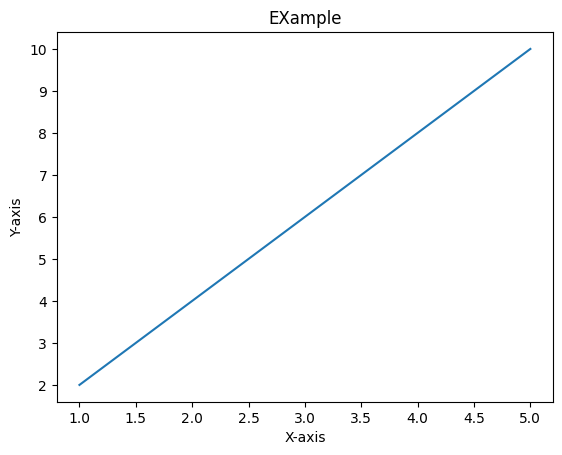

In [218]:
x = [1,2,3,4,5] # 샘플 데이터
y = [2,4,6,8,10]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('EXample')
plt.show()

In [ ]:
데이터 시각화에 필요한 도구 1. plot()

In [259]:
# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({
    'A': [1,2,3,4,5],
    'B': [5,4,3,2,1]
})
df

,A,B
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


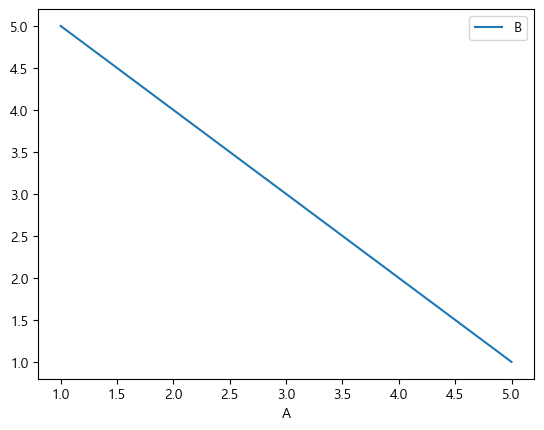

In [260]:
df.plot(x='A', y='B')
plt.show()

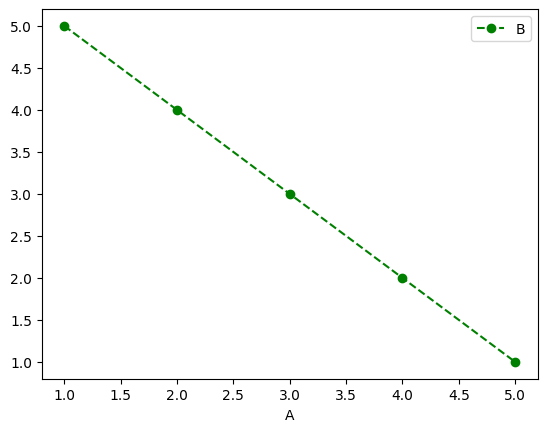

In [222]:
# 스타일을 설정하는 방법

df.plot(x='A', y='B', color='green', linestyle='--', marker='o')
plt.show()

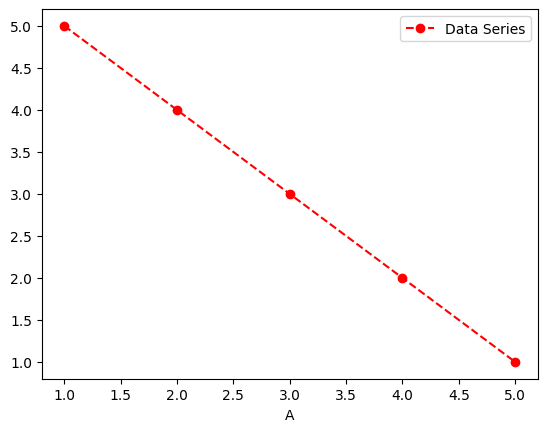

In [223]:
# 범례 추가하는 방법(1) : 그냥 붙이기

df.plot(x='A', y='B', color='red', linestyle='--', marker='o', label='Data Series')
plt.show()

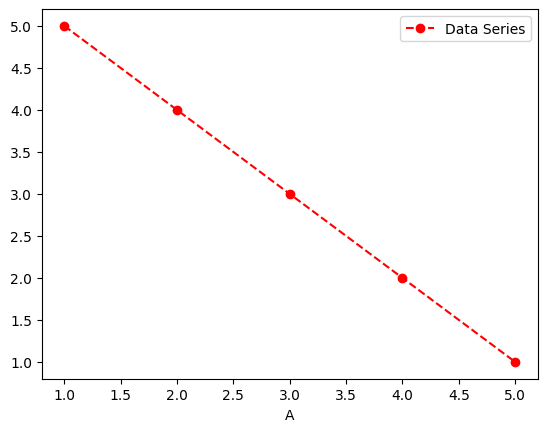

In [224]:
# 범례 추가하는 방법(2) : 레전드
ax = df.plot(x='A', y='B', color='red', linestyle='--', marker='o')
ax.legend(['Data Series'])
plt.show()

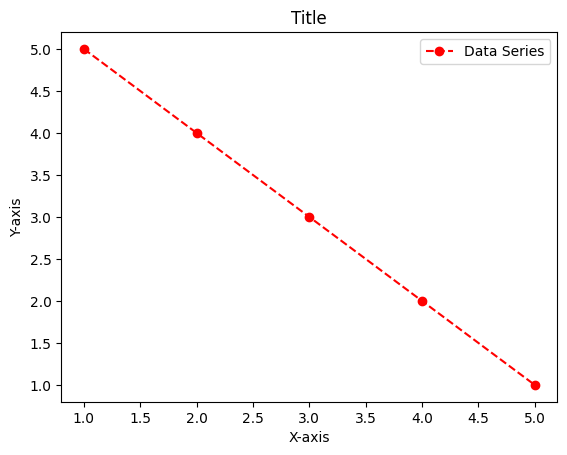

In [226]:
# 축, 제목 입력하기

ax = df.plot(x='A', y='B', color='red', linestyle='--', marker='o')
ax.legend(['Data Series'])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Title')
plt.show()

In [ ]:
x = [1,2,3,4,5] # 샘플 데이터
y = [2,4,6,8,10]
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('EXample')
plt.show()

# 셈플 데이터와 차이나잖아. 이유가 뭔지?

"set_~" 의 의미나 이유는 사실 없고 matplotlib 라이브러리를 만든 사람이 정한 룰? 정도로 보시면 될것같습니다.
set_xlabel 에 대해 물어보셔서 관련하여  matplotlib을 처음 사용하실때 많이 헷갈리는 개념 하나 말씀드리겠습니다.

예를들어 X축 라벨링을 할때 plt.xlabel('X 축 레이블') 이렇게 쓸 때도 있고, ax.set_xlabel('X 축 레이블') 이렇게 쓸 때도 있습니다.
둘 다 똑같이 X축의 레이블을 바꾸는 명령어임에도...
이유는 matplotlib의 기본적인 사용 문법이 2종류로 나뉩니다. 전자는 pyplot 인터페이스고, 후자는 객체지향 인터페이스 입니다.

지금 단계에서 모든 걸 이해하시긴 아마 쉽지 않으실테지만 아래 개념정도만 알고 계시면 될거같아요
1.단순한 그래프 또는 임시적인 데이터 시각화: Pyplot 인터페이스가 적합합니다. ->plt.xlabel('X 축 레이블')
2. 복잡한 그래프, 여러 서브플롯, 세밀한 조정이 필요한 경우: 객체지향 인터페이스가 더 나은 선택입니다. ->ax.set_xlabel('X 축 레이블')

위이 통계학 기초강의 예제에서는 객체지향 인터페이스를 사용했기 때문에 ax.set_xlabel('X 축 레이블')방법으로 레이블링을 진행하였습니다.

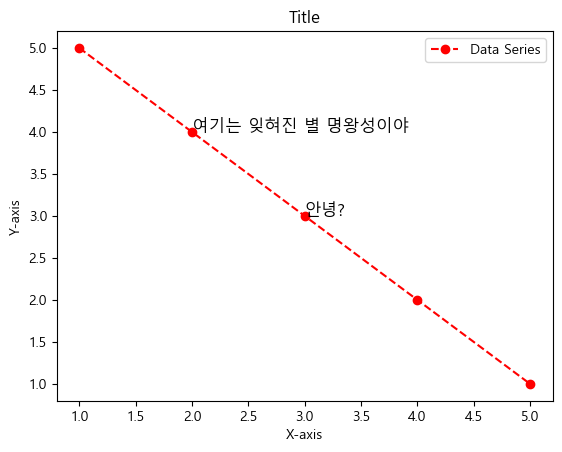

In [240]:
# 텍스트 추가하기

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False # 한글 깨져서 추가함.

ax = df.plot(x='A', y='B', color='red', linestyle='--', marker='o')
ax.legend(['Data Series'])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Title')
ax.text(3, 3, '안녕?', fontsize=12)
ax.text(2, 4, '여기는 잊혀진 별 명왕성이야', fontsize=12)

plt.show()

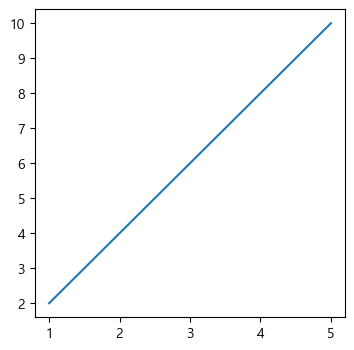

In [239]:
# 그래프 사이즈 변경하기

plt.figure(figsize=(4,4))

x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x, y)
plt.show()

<Figure size 1800x600 with 0 Axes>

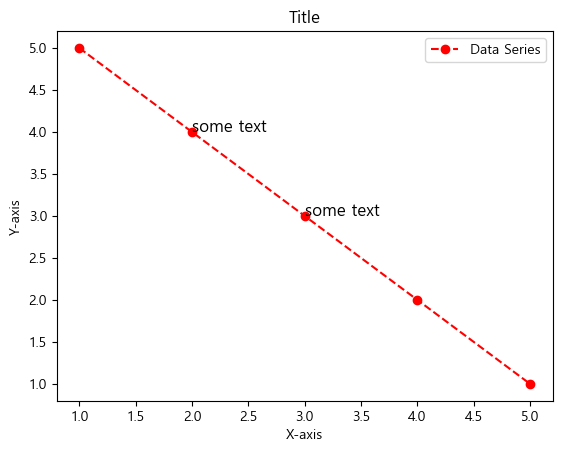

In [245]:
# 그래프 사이즈 변경하기 예제

plt.figure(figsize=(18,6))
ax = df.plot(x='A', y='B', color='red', linestyle='--', marker='o')
ax.legend(['Data Series'])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Title')
ax.text(3, 3, 'some text', fontsize=12)
ax.text(2, 4, 'some text', fontsize=12)

plt.show()

바뀌지 않는 이유는 plt.fiture사이즈와 우리가 만든 plot사이즈 자체가 같은 figure가 아니기 때문이다.

그래서 subplots 메소드를 활용해서 axis를 새롭게 가져오고

그 axis를 plot이라는 메소드 안에 넣어서 활용해주는 방법을 쓴다. (아래로)

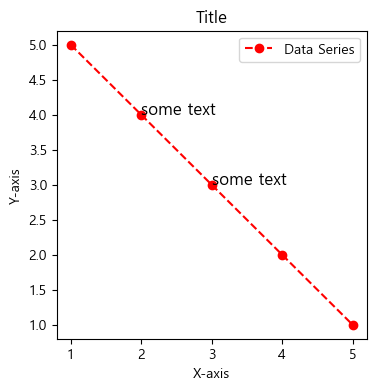

In [246]:
# plt.fiture사이즈와 우리가 만든 plot사이즈 자체가 같은 figure가 아니기 때문이다.
# 그래서 subplots 메소드를 활용해서 axis를 새롭게 가져오고,
# 그 axis를 plot이라는 메소드 안에 넣어서 활용해주는 방법을 쓴다.

# 결론: axis를 plot 메소드 안에 넣고 subplots 이라는 메소드 안에서 사이즈 설정을 하면 됨.

fig, ax = plt.subplots(figsize=(4,4))
ax = df.plot(x='A', y='B', color='red', linestyle='--', marker='o', ax=ax)
ax.legend(['Data Series'])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Title')
ax.text(3, 3, 'some text', fontsize=12)
ax.text(2, 4, 'some text', fontsize=12)

plt.show()

In [ ]:
그래프 그리기 - 차트

# 그래프 유형 / 자료 유형 / 특징

1. Line Plot 연속형 데이터
데이터의 변화 및 추이를 시각화

2. Bar Plot 범주형 데이터
카테고리 별 값의 크기를 시각적으로 비교

3. Histogram 연속형 데이터
데이터 분포, 빈도, 패턴 등을 이해

4. Pie Chart 범주형 데이터의 비율
범주별 상대적 비율을 부채꼴 모양으로 시각화

5. Box Plot 연속형 데이터의 분포
중앙값, 사분위수, 최소값, 최대값, 이상치 확인

6. Scatter Plot 두 변수 간 관계
변수 간의 관계, 군집, 이상치 등 확인

In [ ]:
1. Line : 시간에 따른 데이터의 변화 추세를 보는데 효과적이다.

In [247]:
# seaborn 불러오기
import seaborn as sns
# 데이터 셋 불러오기
data = sns.load_dataset('flights')
# 이거 어디서 가져오는거?

In [248]:
data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [263]:
# 연도별 승객의 변화 추세 - 일단 그룹화

data_grouped = data[['year', 'passengers']].groupby('year').sum().reset_index()
data_grouped

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


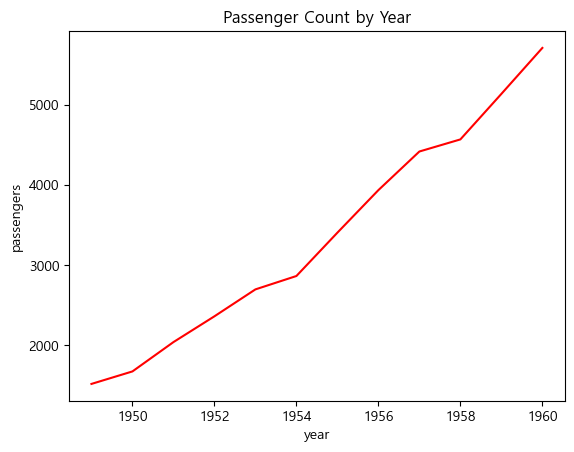

In [270]:
# 선그래프 그리기 1차 작성했는데 plt 생략함!!! 그리고 plot말고 plt!!!
# plot(data_grouped['year'], data_grouped['passengers'])
# plot.xlabel('year')
# plot.ylabel('passengers')
# plot.show()

plt.plot(data_grouped['year'], data_grouped['passengers'], color='red') # 레드추가
plt.xlabel('year')
plt.ylabel('passengers')
plt.title('Passenger Count by Year')
plt.show()

In [ ]:
우상향 하는 그래프 확인 가능 = 시간에 따른 데이터 변화 추세 확인 가능

In [ ]:
2. bar(막대) 그래프 : 범주형 데이터를 나타낸다. 막대로 값의 크기를 비교할 때 유용하다.
histogram : 연속적인 데이터의 분포를 보여주는 그래프, 데이터의 빈도를 시각화해서 특정정보를 얻고자 할 때 유용하다.

In [261]:
# 데이터프레임을 일단 만들어볼까?
df = pd.DataFrame({
    '도시': ['서울', '부산', '대구', '인천'],
    '인구': [990,250,250,290]
})
df

,도시,인구
0,서울,990
1,부산,250
2,대구,250
3,인천,290


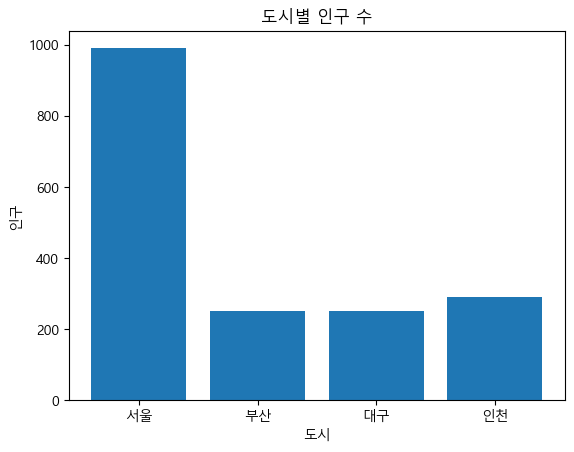

In [271]:
plt.bar(df['도시'], df['인구'])
plt.xlabel('도시')
plt.ylabel('인구')
plt.title('도시별 인구 수')
plt.show()

In [ ]:
# 스타일을 설정하는 방법
df.plot(x='A', y='B', color='green', linestyle='--', marker='o')

갑자기 직전의 plt.plot과 처음에 배운 df.plot의 차이가 뭔지 궁금했단 말이지?

위의 선 그래프도 컬러를 추가하고 싶은데 위치가 애매했다고?

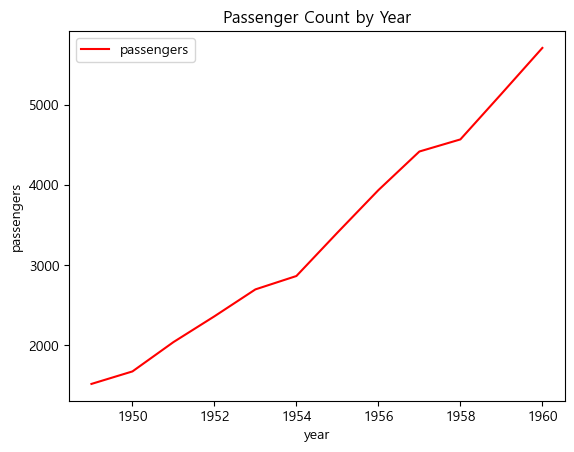

In [275]:
# 그래서 data_grouped.plot(color='red') 하니까 그래프 2개 됐고 답을 깨달음.
# .plot이 선그래프 메소드인데 변수를 밖으로 빼는거랑 안으로 넣는 차이 같다.

# 해볼까? 아래는 선그래프 예시고 새로 만들어 본다.

# plt.plot(data_grouped['year'], data_grouped['passengers'], color='red')
# plt.xlabel('year')
# plt.ylabel('passengers')
# plt.title('Passenger Count by Year')
# plt.show()

data_grouped.plot(x='year', y='passengers', color='red') # 데이터프레임이름.plot은 색인 없이 값을 지정한다.
plt.xlabel('year')
plt.ylabel('passengers')
plt.title('Passenger Count by Year')
plt.show()

해답 : 오잉? 기본 값이 y축에 대한 범례를 만들어 버리는 구나? -> 아그러네 내가 놓친 부분이네.

In [ ]:
3. 히스토그램 : 연속형 데이터(넘파이로 생성해서 실습)의 "분포"를 확인할 때 쓴다.
＊넘파이 : 여러가지 숫자 및 연산등을 제공하는 파이썬 라이브러리

In [276]:
import numpy as np

In [278]:
data = np.random.randn(1000)
# 배열(array)형태로 1000개의 데이터가 랜덤 생성된다.
data.shape # 열과 행에 대한 데이터가 어떻게 분포되어 있는지 간단하게 확인 가능하다.
# 한 컬럼 내의 데이터 값 분포를 볼 때 좋겠다. x, y축이 있는게 아니다.

(1000,)

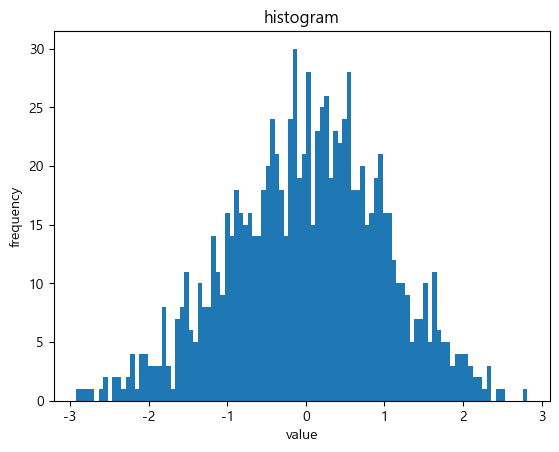

In [285]:
plt.hist(data, bins=100) # 데이터 분포 구간에 대한 범위 설정 값
# bins를 수정하면서 차트로 잘 표현된 값이 어느 것인지 확인하면서 히스토그램을 활용한다.
plt.xlabel('value')
plt.ylabel('frequency') # 빈도를 나타내는 거니까
plt.title('histogram')
plt.show()

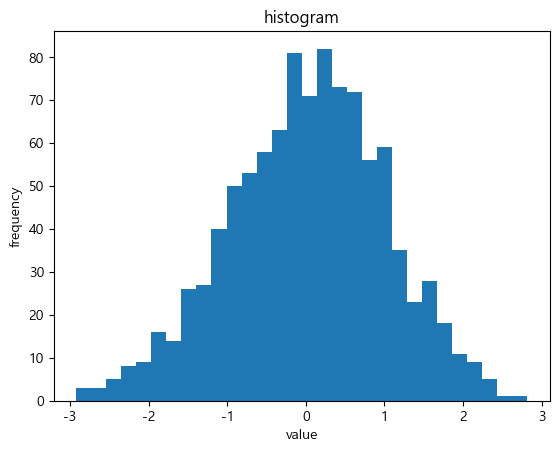

In [286]:
plt.hist(data, bins=30) # 데이터 분포 구간에 대한 범위 설정 값의 차이 (100 vs 30)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram')
plt.show()

In [ ]:
4. Pie 차트 : 전체 데이터에서 각 부분의 비율을 보여주는 차트이기에
예를 들어 카테고리 별 비율을 비교할 때, 범주형 데이터별 값들이 어느정도 비율로 분포되어 있는지 보고싶을 때

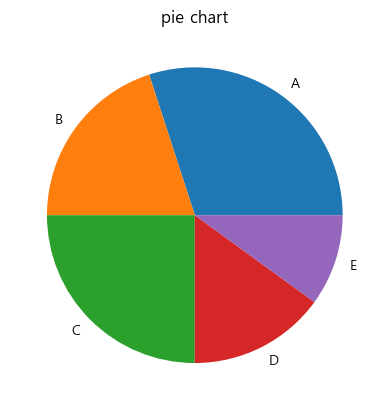

In [288]:
size = [30, 20, 25, 15, 10]
label = ['A', 'B', 'C', 'D', 'E']
# 그 안에 넣는게 size, 레이블은 lable변수값
plt.pie(size, labels=label)
plt.title('pie chart')
plt.show()

In [ ]:
(추가적으로)
1. autopct='%1.1f%% 를 활용해서 각부분에 대한 백분율을 텍스트로 표시할 수 있다.


2. startangle 매개변수는 파이 차트의 시작 각도를 설정한다.
기본적으로 파이 차트는 0도 각도에서 시작하여 시계 방향으로 부채꼴을 그린다.
startangle을 사용하면 부채꼴의 시작 각도를 조절할 수 있다.
startangle=90 설정 시 파이 차트는 90도 각도에서 시작하여 반시계 방향으로 부채꼴을 그린다.

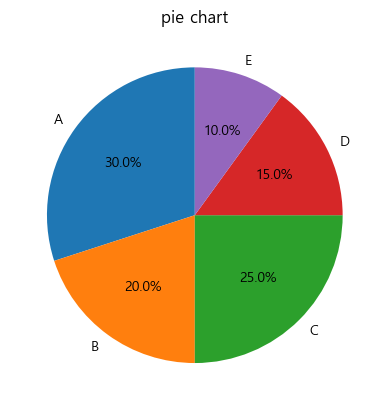

In [305]:
size = [30, 20, 25, 15, 10]
label = ['A', 'B', 'C', 'D', 'E']
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('pie chart')
plt.show()

In [ ]:
5. Box plot : 데이터의 분포와 이상치를 시각적으로 보여주는 그래프

중앙값, 사분위수(데이터를 크기순으로 정렬했을 때, 전체 데이터를 4등분하는 지점을 나타냄),
최솟값, 최댓값 등의 정보를 제공하면서 데이터의 통계적 특성을 파악하는데 매우 요이하다.

특정 카테고리가 가지는 값의 범위를 보고 싶거나,
이상치를 확인하고 싶을 경우 활용하면 데이터 파악에 매우 좋다.

seaborn에 있는 iris 데이터셋을 활용해서 실습을 진행한다.

In [1]:
import seaborn as sns
# 꽃받침(sepal)의 길이, 너비, 꽃잎의 길이, 너비를 나타내는 데이터셋
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
꽃 종별로 꽃받침 길에 대한 데이터 분포와 이상치를 확인하기 위해서 박스 플롯을 그려본다.

In [ ]:
처리가 필요하다.

1. 불러온 데이터를 하나의 리스트화 시켜준다.

In [6]:
iris['species'].unique() # 유니크 메소드 활용

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris[iris['species'] == 'setosa'].head() # iris[행 조건문][열 조건문]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris[['sepal_length', 'sepal_width']][iris['species'] == 'setosa'].head() # 앞 뒤 바꿔도 값이 같네.

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
[iris[iris['species'] == 'setosa']['sepal_length']] # 이렇게 하면 그냥 Series라고 하네

Pandas의 Series는 1차원 배열로, 나열된 데이터를 가지고 있다.
각 데이터는 인덱스(index)와 값(value)으로 이루어져 있다.
시리즈는 표 형태의 데이터에서 한 열(column)에 해당한다.
따라서 시리즈는 열의 데이터를 담는 구조이며, 데이터프레임(DataFrame)은 여러 시리즈를 모아 표 형태로 구성한 것입니다.

In [3]:
spec = iris['species'].unique() # 변수로 활용

In [4]:
# 리스트를 생성할 때는 대괄호([])를 사용하며, 이중 대괄호를 사용하여 여러 개의 리스트를 포함하는 리스트를 만들 수 있다.
sepal_lengths_list = [iris[iris['species'] == s]['sepal_length'].tolist() for s in spec]

In [5]:
sepal_lengths_list

[[5.1,
  4.9,
  4.7,
  4.6,
  5.0,
  5.4,
  4.6,
  5.0,
  4.4,
  4.9,
  5.4,
  4.8,
  4.8,
  4.3,
  5.8,
  5.7,
  5.4,
  5.1,
  5.7,
  5.1,
  5.4,
  5.1,
  4.6,
  5.1,
  4.8,
  5.0,
  5.0,
  5.2,
  5.2,
  4.7,
  4.8,
  5.4,
  5.2,
  5.5,
  4.9,
  5.0,
  5.5,
  4.9,
  4.4,
  5.1,
  5.0,
  4.5,
  4.4,
  5.0,
  5.1,
  4.8,
  5.1,
  4.6,
  5.3,
  5.0],
 [7.0,
  6.4,
  6.9,
  5.5,
  6.5,
  5.7,
  6.3,
  4.9,
  6.6,
  5.2,
  5.0,
  5.9,
  6.0,
  6.1,
  5.6,
  6.7,
  5.6,
  5.8,
  6.2,
  5.6,
  5.9,
  6.1,
  6.3,
  6.1,
  6.4,
  6.6,
  6.8,
  6.7,
  6.0,
  5.7,
  5.5,
  5.5,
  5.8,
  6.0,
  5.4,
  6.0,
  6.7,
  6.3,
  5.6,
  5.5,
  5.5,
  6.1,
  5.8,
  5.0,
  5.6,
  5.7,
  5.7,
  6.2,
  5.1,
  5.7],
 [6.3,
  5.8,
  7.1,
  6.3,
  6.5,
  7.6,
  4.9,
  7.3,
  6.7,
  7.2,
  6.5,
  6.4,
  6.8,
  5.7,
  5.8,
  6.4,
  6.5,
  7.7,
  7.7,
  6.0,
  6.9,
  5.6,
  7.7,
  6.3,
  6.7,
  7.2,
  6.2,
  6.1,
  6.4,
  7.2,
  7.4,
  7.9,
  6.4,
  6.3,
  6.1,
  7.7,
  6.3,
  6.4,
  6.0,
  6.9,
  6.7,
  6.9,
  5.

In [346]:
len(sepal_lengths_list) # 종별로 모아서 3개의 리스트를 이중 리스트로 묶었고,

3

In [347]:
len(sepal_lengths_list[0]) # 각리스트마다 50개의 데이터가 있다.

50

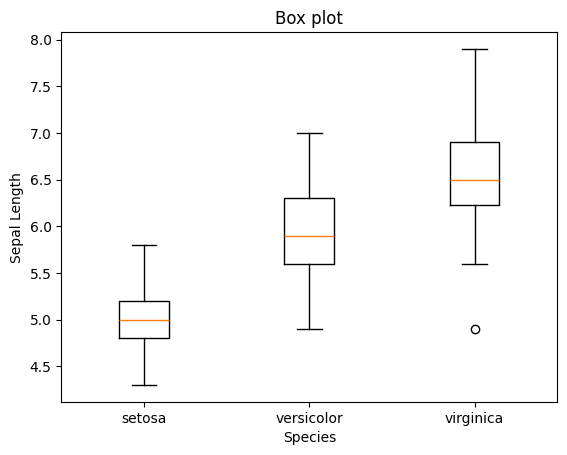

In [11]:
plt.boxplot(sepal_lengths_list, labels=spec)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Box plot') # x축은 유니크 카테고리
plt.show() # y축은 해당 값에 대한 분포가 나온다.

In [ ]:
데이터 셋을 만들 때 컬럼의 리스트 형태로 데이터프레임을 구성했던 거 기억나니?

df = pd.DataFrame({
    '도시': ['서울', '부산', '대구', '인천'],
    '인구': [990,250,250,290]})

그러한 형태로 만들어주기 위해 위처럼 리스트형으로 전처리를 한 것이다.

In [ ]:
1. 가운데 노란선이 중앙값이다.
2. 선을 중심으로 아랫박스는 25%
3. 선을 중심으로 위의박스는 75%
4. 전체 박스 값이 25~75 구간을 의미한다.
5. 위아래로 작게 그어진 가로 실선은 최솟값, 최댓값이다.
6. 오른쪽 하단의 점은 아웃라이어, 최소-최댓값에 벗어난 값.
7. 보통 분석할 때 평균이나 값에 영향을 줄 수 있어서 제거하는 방향으로 진행한다.
**8. 다른 방법으로도 boxplot을 만들 수 있다.

In [ ]:
(추천) 판다스 문서 많이 읽기
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [ ]:
여태까지 seaborn 내장 데이터로 실습을 하고 있다.

사실 맥플롯과 같은 시각화 라이브러리임. seaborn으로 

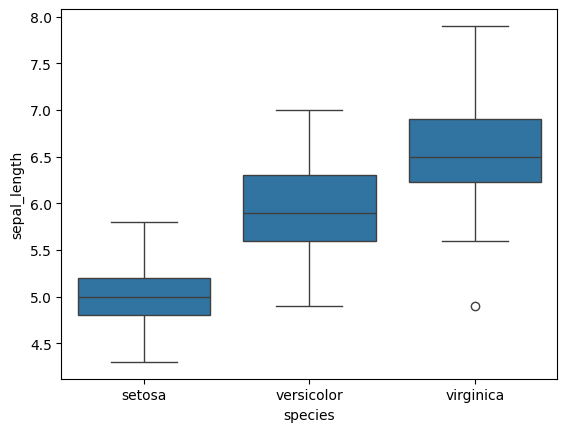

In [10]:
import pandas as pd
import matplotlib.pyplot as plt # 와 matplotlib.pyplot 함수 빼먹어서 자꾸 오류나 땀났다.

sns.boxplot(x='species', y='sepal_length', data=iris)
plt.show() # 비슷하게 그려진다.

In [ ]:
데이터 전처리 / 분석 / 시각화 과정에 정답은 없다.

산출물이 나올 수 있도록 접근 방법이 다를 수 있다.

계속 학습하며 "가장 편한 방법"으로 결과물을 내면 된다:)

어떻게 보면 seaborn이 더 간편할 수 있으니 공부해보길!

In [ ]:
6. Scatter 차트 = 산점도

: 두 변수 간의 관계를 점으로 표시해서 보여주는 그래프, 상관분석을 하거나/변수간의 관계성을 확인할 때 사용한다.

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


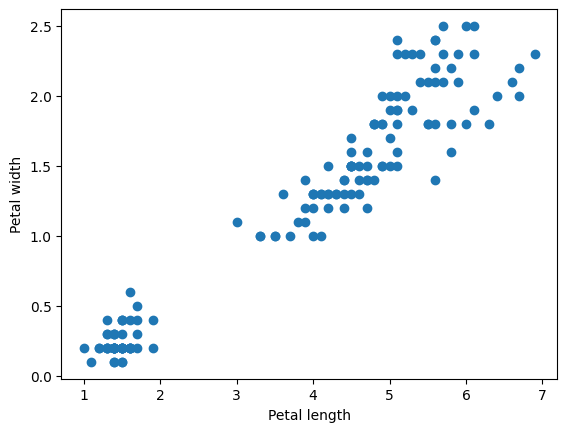

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(iris['petal_length'], iris['petal_width'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show() # 선형태를 띄면서 우측으로 증가하는 모습을 보인다. 관계성 있음이 추측됨.

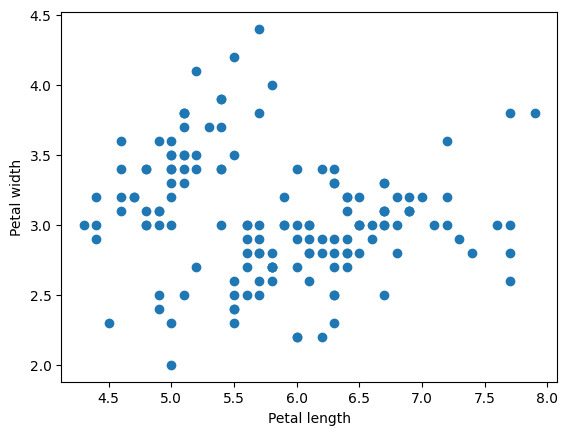

In [11]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show() # 규칙을 알 수 없는 산개된 정도. 하지만 부정확하니 수치화 한다.

In [ ]:
수치화 corr 메소드 활용 : 각각의 상관성을 수치화해서 변수마다 상관계수를 뽑아서 서로 얼마나 관련이 있는지를 확인할 수 있음.

상관 분석에도 여러가지 종류의 분석 방법이 존재한다.

In [ ]:
iris.corr() → 스트링으로 된 값이 있기에 오류가 난다.

해걸 1. 해당 데이터셋을 전처리해서 원하는 형태로 만들고 해당 메소드를 활용해서 상관성 확인.
해결 2. corr 메소드 내에서 numeric_only=True 로 설정하면 숫자형태의 변수들만 가지고 상관성을 나타낼 수 있다.

In [12]:
iris.corr(numeric_only=True) # 상관계수를 나타내는 표이다.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
크로스해서 보면 돼. '0.9'로 높은 상관성이 있다고 나오는데 실제 그래프도 맞음. 다른거도 해보자.

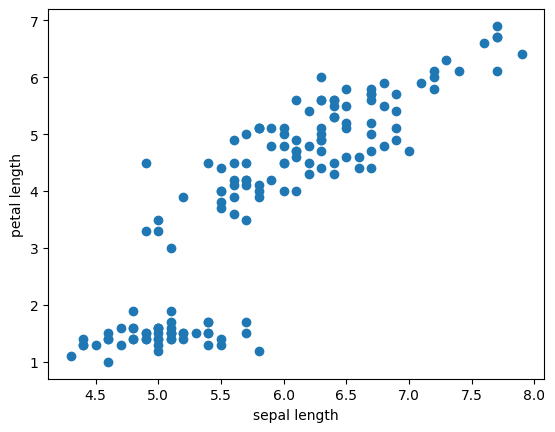

In [13]:
plt.scatter(iris['sepal_length'], iris['petal_length']) # 0.871754 높은 수치
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()  # 상관성이 있다고 충분히 볼 수 있음. 표와 그래프가 어느정도 유사/일치한다.

In [ ]:
두 변수 간의 관계를 점으로 표시해주는 그래프이기 때문에
데이터 분석을 할 때 두 변수간의 상관성/관계성을 보고싶을 때
가장 먼저 scatter plot을 그려보는 접근을 할 수 있겠다. 굿굿!!

In [ ]:
1. 선그래프 : 데이터의 시계열에 따른 변화 및 추이를 시각화하는데 용이하다
2. 막대그래프
3. 히스토그램 : 막대랑 다르게 연속형 데이터를 가지고 시각화를 한다.
4. 파이차트 : 원형, 부채꼴 모양. 한 눈에 비율을 확인할 수 있음.
5. box plot
6. scatter plot

In [ ]:
box plot

1. 상자는 데이터에 대한 중앙값과 중앙값에서도 25%와 75% 사이에 헤당하는
사분위수에 해당하는 범위를 박스형태로 나타내고 있다.
2. 상자의 중간은 평균값이 아니고 중앙값이다.
3. 일반적인 범위를 넘어가는 값을 outliers라고 한다.
4. 수염의 끝부분이 최솟값, 최댓값을 의미한다.
5. 다수의 그룹, 또는 범주간의 데이터 분포를 비교하는데 유용하다.
6. 통계적으로 중요한 데이터들의 수치적인 값을 시각적으로 표현하는데 굉장히 유용하다.

scatter plot

상관관계 요약 : 가장 많이 언급되는 피어슨 상관 계수에 대해

1. 주로 연속형(숫자) 변수들 간의 상관관계를 평가하는데 사용됨.
2. -1에서 1사이의 값을 가진다.
3. 1에 가까울 수록 양의 선형관계 : a가 증가할 때 b도 증가한다.
4. -1에 가까울수록 음의 선형관계 : a가 증가할 때 b가 감소한다.
5. 0에 가까울수록 선형관계가 약한 관계를 가진다.
6. 주의점 : 상관성이 있다고 해서 인과관계를 의미하는 것은 아니다. !!!!!!!!!!!

ex) a가 증가할 때 b도 증가한다. = 강한 양의 상관관계
a 때문에 b가 증가한 건 아닐 수 있다!
= a과 b에 대한 인과성은 별도의 의미를 가진다.
= 단순히 상관분석만으로는 인과성을 파악해내기 어렵다.

In [ ]:
여기까지 데이터에 대한 스킬적인 부분은 어느정도 전달이 끝났다.

나머지에 대한 부분은 과제와 함께 여러 데이터 셋을 만져보면서

실제로 배운 것을 활용해서 차트를 계속 그려봐주면 그것만큼 실력이 느는 방법도 없다.

다음 챕터에도 설명하겠지만 여러 데이터 셋, 혹은 공공 데이터 셋, 혹은 자체 제작

활용하면서 데이터 시각화하는 부분, 전처리 부분을 계속해서 실습하면

손에 익으면서 실력이 늘기에 반복되는 연습 밖에 답이 없다는 걸 알려주며 마친다.

In [ ]:
나는 이제 전처리와 시각화를 할 수 있는 사람이 되었다. 하.하.하

In [ ]:
이번 강의 목표 : 대략적으로 전처리, 시각화, 방법을 이해했다면 다음 학습으로 이어나갈 수 있다.

In [ ]:
이제는 강의학습에 그치는 것이 아니라 내가 원하는 것을 찾아서 공부해보는 습관을 꼭 들이자.

In [ ]:
[마지막 강의] 데이터 분석가로 홀로서기 방법

In [ ]:
Q. 강의에는 없는 내용은 어떻게 학습할 수 있을까?

In [ ]:
이런 고민은 주니어나 시니어나 똑같음. 두 가지만 기억해라.

1. 반복연습이 답이다.
2. 적절한 구글검색

In [ ]:
1. 외국어랑 비교하더라도 원어민처럼 유창하기 쉽지 않다.

자주 사용하는 습관 환경을 만들어야 한다.

10분 판다스를 추천한다.

판다스에서 주로 사용되는 함수를 굉장히 쉽게 사용 가능하도록 설명되어 있음.

10분 판다스를 맹목적으로 받아쓰기 하듯이 연습한다.

영어타자가 느린 편인데 파이썬 코딩할 때 속도가 up 스킬도 update_display

파이썬이라는 코드, 판다스 라이브러리에 대해서 익숙해지는 시간을 가졌으면 좋겠다.

감을 잊어버리지 않았으면 좋겠다.

In [ ]:
2. 구글 신은 모든 것을 알고 있다.

물어볼 사람이 없다. 구글, gpt를 통해 스스로 답을 찾는 연습을 하는 것이 성장에 도움된다.

스스로 답을 찾는 연습을 꾸준히 하면 좋겠다.

간혹 잘못된 정보를 얻을 수 있으니 마지막에 추가적 크로스 체킹하는 습관도 갖추길 바람.

In [ ]:
다시 한번 강조! 체킹하며 방향성 잃지 않기

1. 목표 설정하기
2. 예상 산출물 정의하기
3. As-is 현재 문제와 상황에 대한 인지
4. To-be 문제 개선을 위한 방향성 설정

In [ ]:
1. pandas 라이브러리
2. 대시보드 툴 : 대부분 사용자 친화적

차이점

태블로 : 자체 클라우드 기능 제공한다.
데이터 스튜디오 = 루커 스튜디오 : 구글 서비스와 연동되고 확장이 가능하다.
아마존 퀵사이트 : aws 내에서 확장이 가능하다.

In [ ]:
코딩 스킬은 연습하면 늘지만

내가 하고 싶은 데이터 분석은

방향성에 따라서 매우 다르고

이를 위한 역량 또한 다르다.

때문에 희망하는 데이터 분석가의 청사진을 꼭 그려보자.

내가 되고 싶은 데이터 분석가는 누구인가요?